In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
import requests
import os
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

In [2]:
covid_df = pd.read_csv('owid-covid-data.csv')

In [3]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [4]:
covid_swiss_df = covid_df[covid_df.location == 'Switzerland']

In [5]:
reference_col = ['location', 'population', 'population_density', 'median_age', 'aged_65_older', \
                 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', \
                'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', \
                'life_expectancy']

reference_df = covid_df.groupby('location', as_index=False).mean()[reference_col]

In [6]:
# If I use 'today' instead of 'yesterday' I need to run the notebook after around 2 p.m. CET
# when many countries have updated the numbers. 
# To make sure it works at any time, I include here the date of one day ago

yesterday = datetime.now().date() - timedelta(days = 1) # This returns a Date time
yesterday = pd.Timestamp(yesterday)

covid_now = covid_df[covid_df.date == yesterday]

# Covid

## Data Analysis Project

### June 25th 2020

### Data Analyst Nanodegree Student: Oana Maria Vasilescu

### How did the number of total Covid cases and total Covid deaths change over time? Is the trend now still rising or has the spread slowed down?

A new Corona virus was discovered in December 2019 and since then it has infected millions of people. Unfortunately, it doesn't look like the trend has slowed down even after more than half a year; on the contrary, the number of Covid cases and Covid deaths in the world continue to increase.

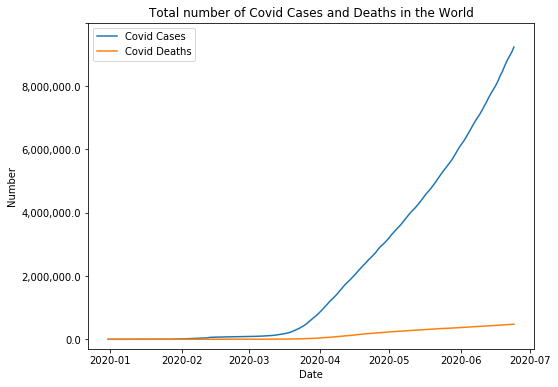

In [7]:
register_matplotlib_converters()

plt.figure(figsize = (8,6))
ax1 = sb.lineplot(data = covid_df[covid_df.location == 'World'], x = 'date', y = 'total_cases');
sb.lineplot(data = covid_df[covid_df.location == 'World'], x = 'date', y = 'total_deaths');

plt.title('Total number of Covid Cases and Deaths in the World')
plt.xlabel('Date')
plt.ylabel('Number')

ylocs, labels = plt.yticks()
plt.yticks(ylocs, [f"{num:,}" for num in ylocs[:-1]]);
plt.ylim(-300000, ylocs[-1])

ax1.legend(['Covid Cases', 'Covid Deaths']);

### How fast did Covid spread in each continent?

We can see in the following plot that even if China was the first country to be affected by Covid, Asia had a slow increase until April 2020. This is due to the rapid and strict measures that asian countries implemented initially. Once these measures were relaxed, the spread increased. This is probably also due to the current situation in India, where the numbers have recently started to increase.

Europe had a fast increase since March, when the number of cases in Italy and Spain increased drastically, but the curve seems to have slightly slowed down. North America has currently the highest number of Covid cases, mostly due to the fact that U.S. has more than 2.4 million Covid cases. The Covid spread seems to have reached South America as well, where Brazil is highly affected. Let's just hope that the numbers in Africa will remain low and we won't see a similar pattern there.

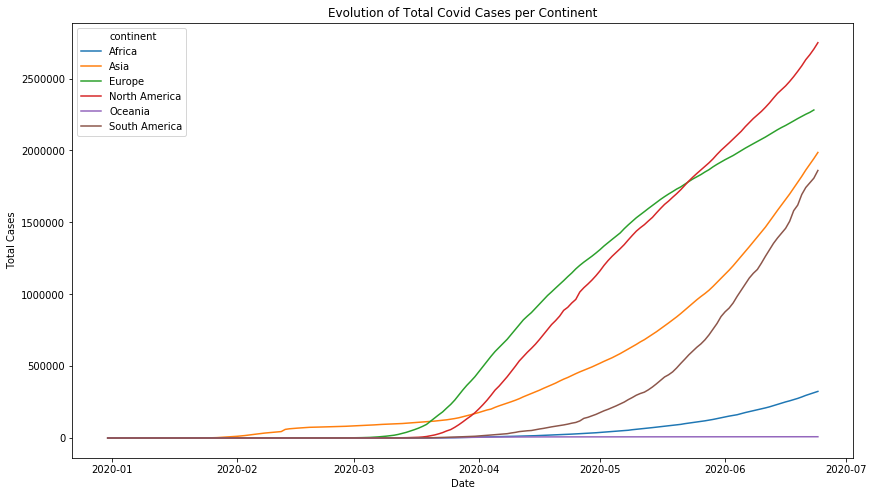

In [8]:
covid_wrl_time = covid_df.groupby(['date', 'continent'], as_index = False)['total_cases'].sum()

# Get the index of the most current entry for Europe (to drop)
index_to_drop = covid_wrl_time[(covid_wrl_time.date == yesterday) & (covid_wrl_time.continent == 'Europe')].index

# Drop the incorrent entry
covid_wrl_time.drop(index = index_to_drop, inplace=True)


plt.figure(figsize = (14,8))
sb.lineplot(x="date", y="total_cases", hue = 'continent', err_style = None, data=covid_wrl_time);
plt.title('Evolution of Total Covid Cases per Continent')
plt.xlabel('Date')
plt.ylabel('Total Cases');

### Distribution of total cases, new cases, total deaths, new deaths

In the next plot, we look at the distribution of total cases and total deaths, new cases and new deaths in the current day. I used a log transformation to look at the data because the data was highly right skewed.

Total Covid cases data looks aproximately normally distributed on log scale. On log scale, the distribution of new Covid cases in the current day looks bimodal, and the distributions of total Covid deaths and new Covid deaths are right skewed. Population density is normally distributed on log scale.

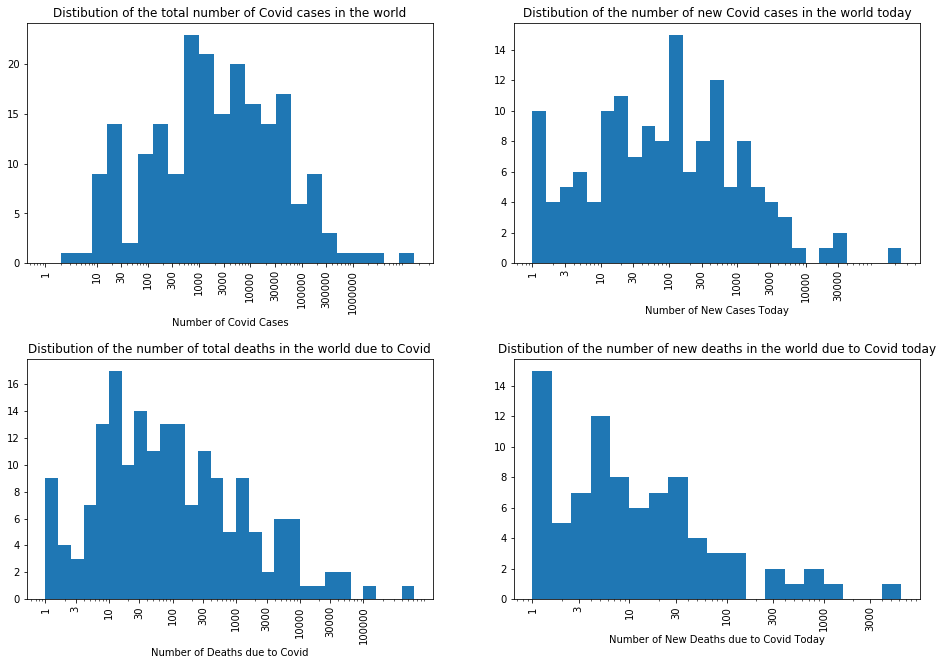

In [9]:
plt.figure(figsize = (16,10))
plt.subplots_adjust(top = 0.90, bottom=0.10, hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
bin_size = 0.3
bin_edges = 10 ** np.arange(0, np.log10(covid_now.total_cases.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'total_cases', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the total number of Covid cases in the world')
plt.xlabel('Number of Covid Cases')

bin_size = 0.2

plt.subplot(2,2,2)
bin_edges = 10 ** np.arange(0, np.log10(covid_now.new_cases.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'new_cases', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the number of new Covid cases in the world today')
plt.xlabel('Number of New Cases Today')

plt.subplot(2,2,3)
bin_edges = 10** np.arange(0, np.log10(covid_now.total_deaths.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'total_deaths', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the number of total deaths in the world due to Covid')
plt.xlabel('Number of Deaths due to Covid')

plt.subplot(2,2,4)
bin_edges = 10 ** np.arange(0, np.log10(covid_now.new_deaths.max()) + bin_size, bin_size)
plt.hist(data = covid_now, x = 'new_deaths', bins = bin_edges);
plt.xscale('log')
ticks_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks_locs, ticks_locs, rotation = 90);
plt.title('Distibution of the number of new deaths in the world due to Covid today')
plt.xlabel('Number of New Deaths due to Covid Today');

### What is the distribution of the maximum stringency index per country?

As a response to the current pandemic, many countries implemented restriction measures to limit the spread of Covid. The stringency index is a way to describe the "strictness" of the rules applied, on a scale from 0 to 100.

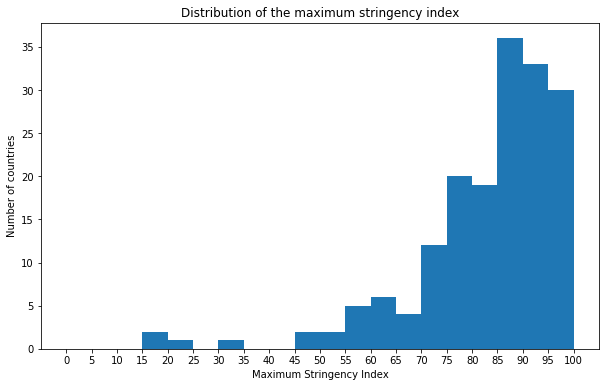

In [10]:
# Get the maximum applied stringency index per country
max_stringency_idx = covid_df.groupby('location', as_index = False)['stringency_index'].max()
max_stringency_idx.sort_values(by = 'stringency_index', ascending = False, inplace = True)

plt.figure(figsize = (10,6))
bin_edges = np.arange(0, 100 + 5, 5)
plt.hist(data = max_stringency_idx, x = 'stringency_index', bins = bin_edges);
plt.xticks(bin_edges);
plt.title('Distribution of the maximum stringency index')
plt.xlabel('Maximum Stringency Index')
plt.ylabel('Number of countries');

### Let's have a look at which countries implemented the strictest and the most lenient measures based on the stringency index based on the available data

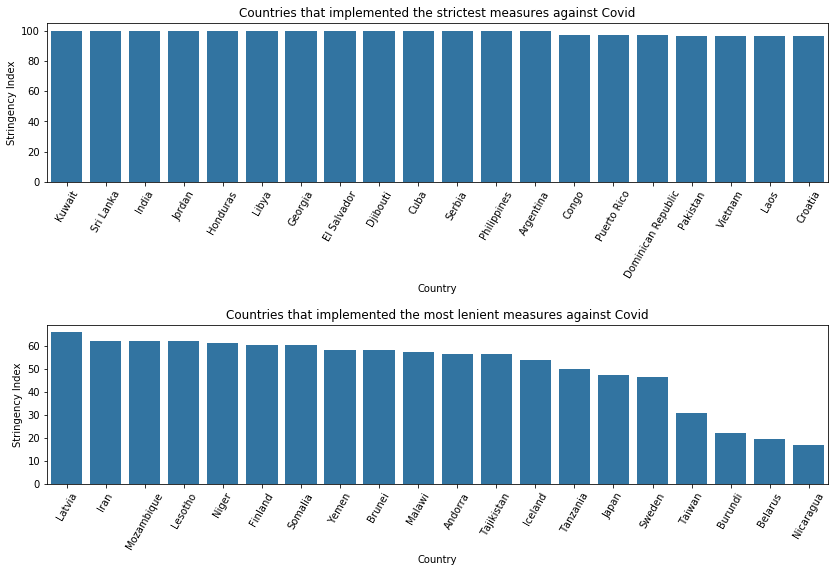

In [11]:
# Countries that implemented the strictest and the most lenient measures

plt.figure(figsize = (14,8))
plt.subplots_adjust(top = 0.90, bottom=0.10, hspace=0.9, wspace=0.4)

base_color = sb.color_palette()[0]

plt.subplot(2,1,1)
sb.barplot(data = max_stringency_idx.iloc[:20], x = 'location', y = 'stringency_index', color = base_color);
plt.xticks(rotation = 60);
plt.title('Countries that implemented the strictest measures against Covid')
plt.xlabel('Country')
plt.ylabel('Stringency Index')

plt.subplot(2,1,2)
sb.barplot(data = max_stringency_idx.dropna().iloc[-20:], x = 'location', y = 'stringency_index', color = base_color);
plt.xticks(rotation = 60);
plt.title('Countries that implemented the most lenient measures against Covid')
plt.xlabel('Country')
plt.ylabel('Stringency Index');

### What are the Covid 'most affected' countries in the world nowadays, based on the average of new cases per million in the last 14 days?

Since the holiday season starts now and the restrictions are lifted in many countries (the flights are once again running as well), people are looking forward to traveling in the next period. It is still advisable to use precaution and avoid the most affected countries of Covid nowadays.

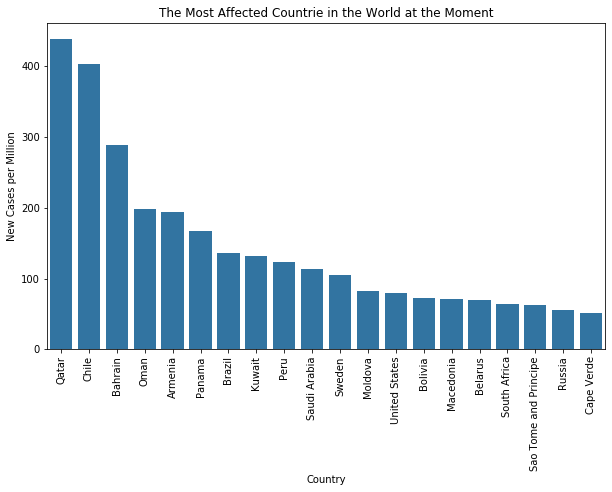

In [12]:
# Date two weeks ago
two_weeks_ago = pd.Timestamp((datetime.now() - timedelta(days=14)).date())

# Extract from 'covid_df' the data of the last two weeks
covid_df_last_two_weeks = covid_df[covid_df.date >= two_weeks_ago]

# Group by country and calculate the average
covid_df_last_two_weeks = covid_df_last_two_weeks.groupby('location', as_index = False)['new_cases_per_million'].mean()

# Sort the DataFrame descending based on the average of new cases per million
covid_df_last_two_weeks.sort_values(by = 'new_cases_per_million', ascending = False, inplace = True)

# Plot the most affected countries nowadays based on the average of new cases per million in the last 14 days
base_color = sb.color_palette()[0]

plt.figure(figsize = (10, 6))
sb.barplot(data = covid_df_last_two_weeks.iloc[:20], x = 'location', y = 'new_cases_per_million', color = base_color);
plt.xticks(rotation = 90);
plt.title('The Most Affected Countrie in the World at the Moment');
plt.xlabel('Country');
plt.ylabel('New Cases per Million');

### Is there any correlation between the total cases per million inhabitants and the GDP per capita?

There is a positive correlation between the GDP per capita and the total Covid cases until this date (June 23rd 2020). This is probably because a more developed economy also implies more travel across borders, more meetings, conferences, leading to a higher spread, at least in the first phase. The continent of each country is also depicted in the plot and allows to see easily that most countries in Africa have a lower GDP per capita, but also less infections. In comparison, Europe has higher GDP per capita but also higher Covid cases.

In [21]:
covid_now.loc[:,'log_total_deaths_per_million'] = np.log10(covid_now['total_deaths_per_million'])
covid_now.loc[:,'log_total_cases_per_million'] = np.log10(covid_now['total_cases_per_million'])

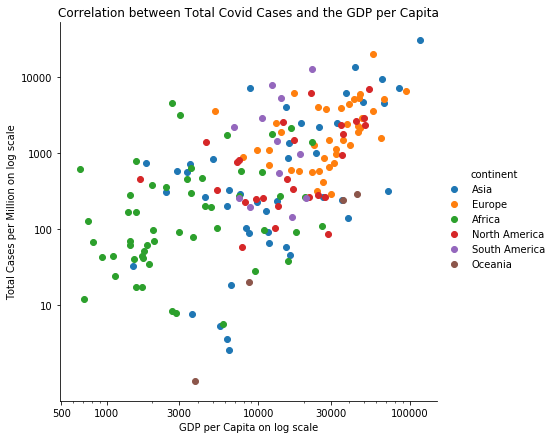

In [14]:
g = sb.FacetGrid(data = covid_now, hue = 'continent', height = 6)
g.map(plt.scatter, 'gdp_per_capita', 'log_total_cases_per_million')
g.add_legend()

plt.xscale('log')
xticks_locs = [500, 1000, 3000, 10000, 30000, 100000]
yticks_labels = [10, 100, 1000, 10000]
plt.xticks(xticks_locs, xticks_locs);
plt.yticks([1,2,3,4], yticks_labels);

plt.xlabel('GDP per Capita on log scale')
plt.ylabel('Total Cases per Million on log scale')
plt.title('Correlation between Total Covid Cases and the GDP per Capita');

###  How did the number of Covid cases changed over time in Switzerland?

Let's have a look at the situation in Switzerland (where I live). I start with a visualization on the total number of cases and total deaths.

We can see that between March and May, the number of Covid cases increased very rapidly in Switzerland, but the measures enforced led to results, such that after May the increase in new Covid cases has slowed down.

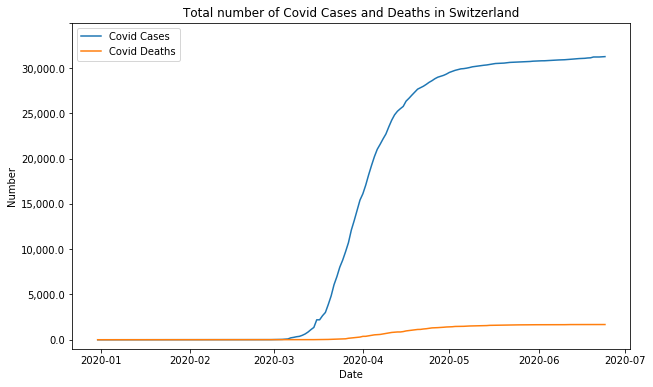

In [15]:
plt.figure(figsize = (10,6))

ax1 = sb.lineplot(data = covid_df[covid_df.location == 'Switzerland'], x="date", y="total_cases")
sb.lineplot(data = covid_df[covid_df.location == 'Switzerland'], x="date", y="total_deaths")

ylocs, labels = plt.yticks()
plt.yticks(ylocs, [f"{num:,}" for num in ylocs[:-1]]);
plt.ylim(-1000, ylocs[-1])

plt.title('Total number of Covid Cases and Deaths in Switzerland')
plt.xlabel('Date')
plt.ylabel('Number')
ax1.legend(['Covid Cases', 'Covid Deaths']);

### Switzerland - Number of new cases per million calculated based on a 14 days rolling average

The current restriction in Romania (my home country) is the following: people can enter Romania only if they come from a country that had less then 5 new Covid cases per million on 14 days rolling average basis

I live in Switzerland and I want to find out if I can fly to Romania. Since the rolling average on a 14 days window of new Covid cases per million is less than 5, it looks that I can travel home.

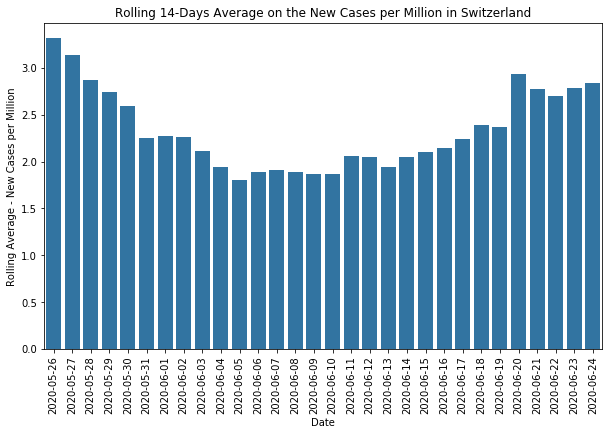

In [16]:
covid_swiss_df.loc[:,'date'] = covid_swiss_df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
covid_swiss_df.loc[:,'new_cases_MA'] = covid_swiss_df['new_cases_per_million'].rolling(window=14, center=False).mean()

plt.figure(figsize = (10, 6))

base_color = sb.color_palette()[0]

sb.barplot(data = covid_swiss_df[-30:], x = 'date', y = 'new_cases_MA', color = base_color);

plt.title('Rolling 14-Days Average on the New Cases per Million in Switzerland')
plt.xlabel('Date')
plt.ylabel('Rolling Average - New Cases per Million')
plt.xticks(rotation = 90);

### Switzerland - Number of tests done per day vs number of new cases found

The last plot answers a question that many of my friends had: how many tests does Switzerland do every day? This and the split between positive and negative test results can be seen in the next graph.

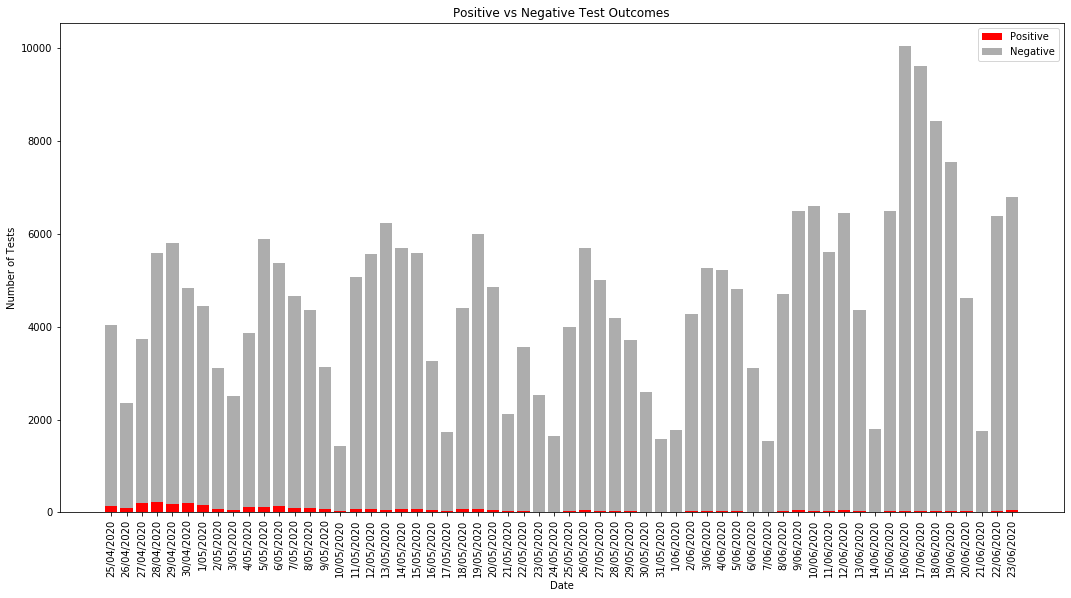

In [17]:
swiss_tests_df = pd.read_csv('swiss-test-data.csv', encoding='utf-16', sep ='\t')

# There are two entries for each day in the dataset - I will visualize for the previous 60 days
swiss_tests_df = swiss_tests_df[-120:]

# Display the number of tests performed vs the number of positive cases in the last month

plt.figure(figsize = (18,9))

baselines = np.zeros(60)

# First category - Datum (60 values - the last 60 days)
# Second category - Outcome_tests (2 values - Positive or Negative)
cat2_order = ['Positive', 'Negative']

for i in range(len(cat2_order)):
    # isolate the counts of the first category
    cat2 = cat2_order[i]
    inner_counts = swiss_tests_df[swiss_tests_df['Outcome_tests'] == cat2][['Datum', 'Number_of_tests']]
    # then plot those counts on top of the accumulated baseline
    if i == 0:
        color = 'red'
    else:
        color = (0.2, 0.2, 0.2, 0.4)
    plt.bar(x = np.arange(60), height = inner_counts['Number_of_tests'].values, bottom = baselines, color = color)
    baselines += inner_counts['Number_of_tests'].values
    
plt.xticks(np.arange(60), swiss_tests_df['Datum'].drop_duplicates().values, rotation = 90)
plt.legend(cat2_order)

plt.title('Positive vs Negative Test Outcomes')
plt.xlabel('Date')
plt.ylabel('Number of Tests');